# Introduction
Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices.

The data set contains sales, profit and geographical information of Super Store.

The goal for my analysis is to analyze the sales data and identify strength and opportunities for super store to boost sales.

I'll also build time series machine learning models to predict the future sales 

The dataset is available on Kaggle: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

# Business Questions
* Which Category is Best Selling?
* Which is the Top Selling Sub-Category?
* Which Customer Segment generates the most sales?
* What is the Preferred Ship Mode?
* Which Region generates the most sales?
* Which City has the Highest Number of Sales?

In [ ]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Superstore Sales.csv').drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# 1. Data cleaning and EDA

In [ ]:
# check the data types and null values. Column "postal code" has one null value - pass.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [ ]:
# convert data type
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') 
df['Postal Code']=df['Postal Code'].astype('str')

In [ ]:
# remove the decimal point to fix postal code format
df['Postal Code']=df['Postal Code'].str.split('.',expand=True)[0]
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#These columns have been successfully converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   object        
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [ ]:
df.duplicated().sum()

1

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
categorical_var = df.select_dtypes('object').drop('Order ID',axis=1)

In [ ]:
numerical_var = df.select_dtypes(['int','float'])

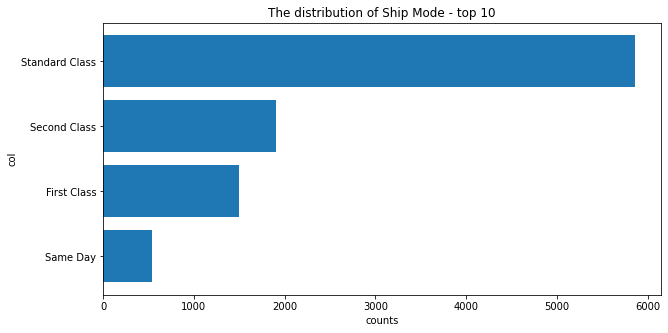

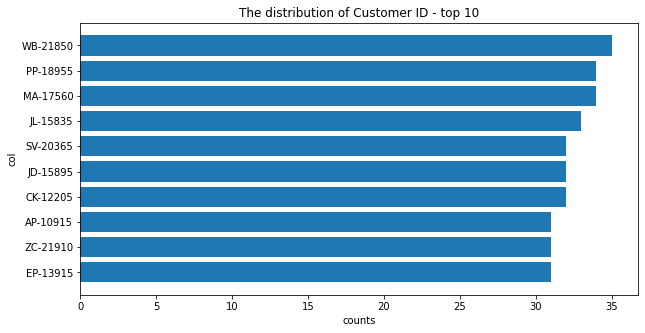

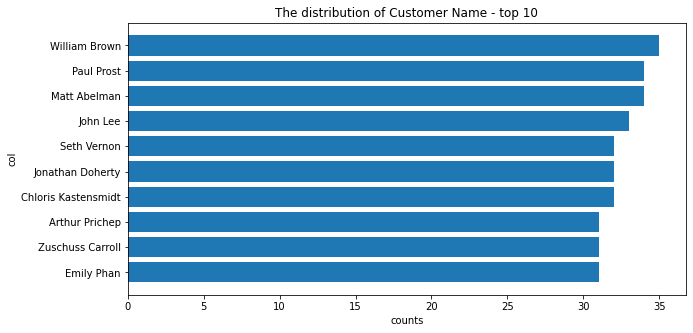

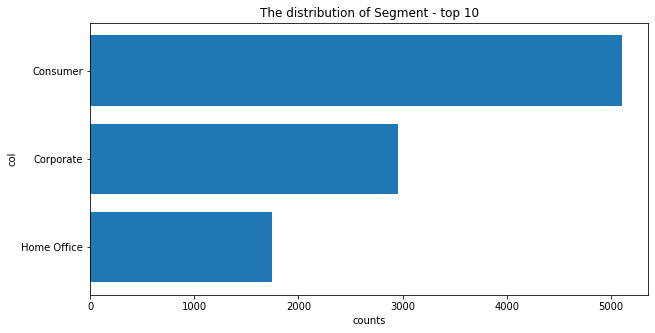

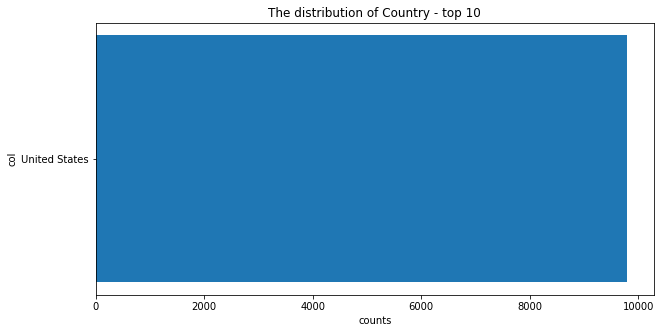

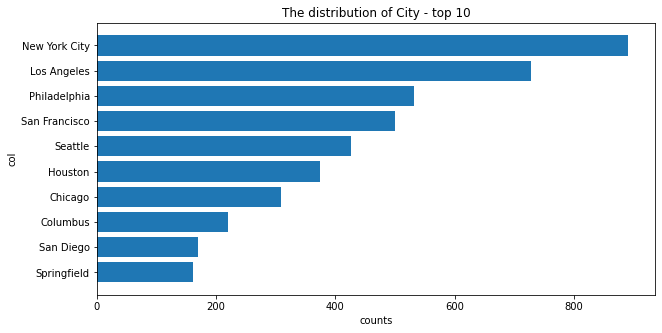

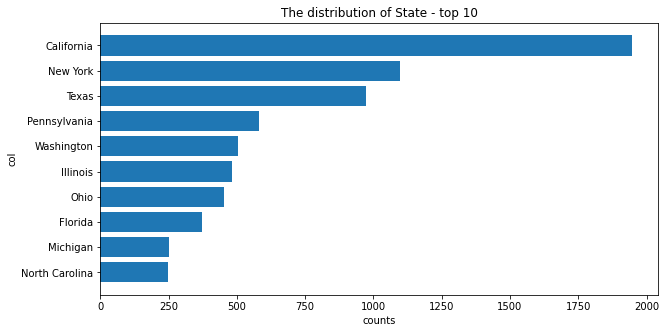

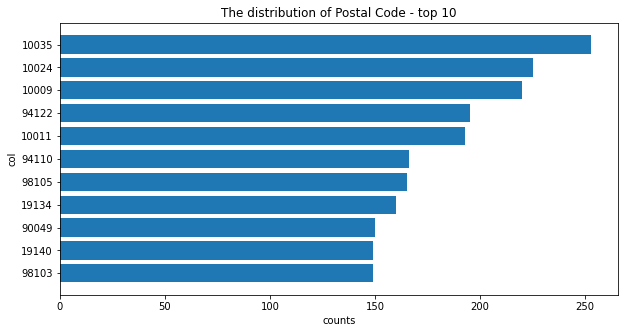

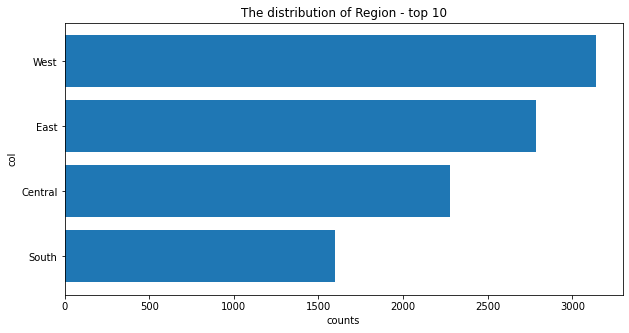

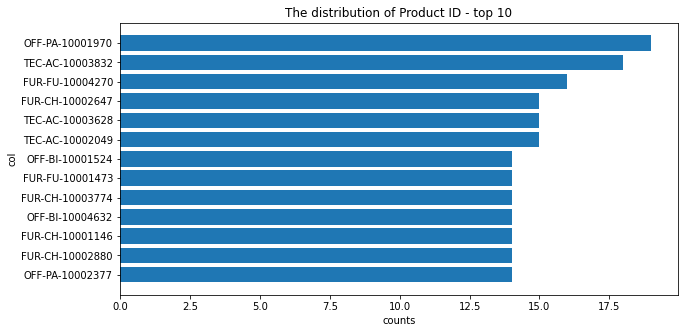

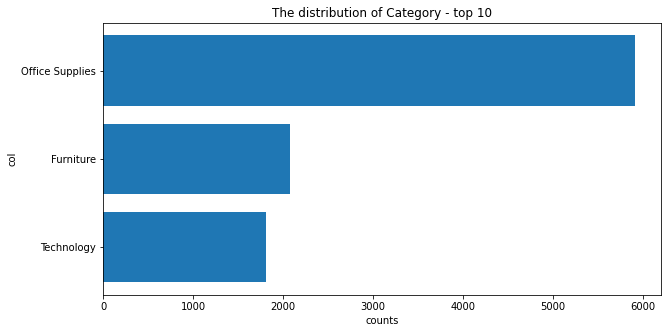

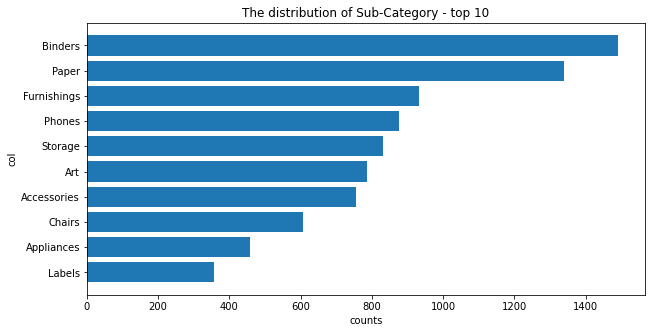

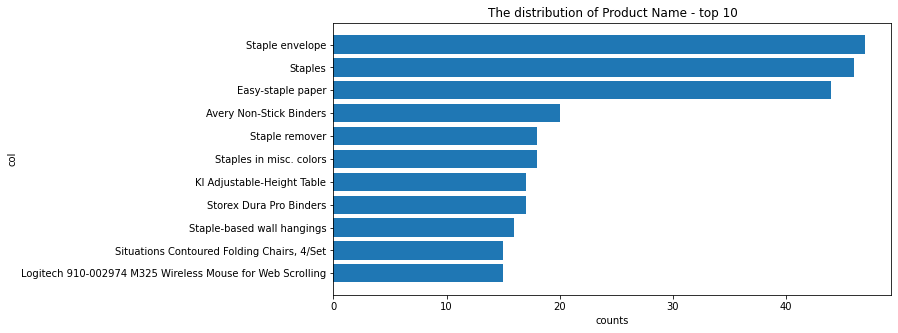

In [ ]:
# plot the distribution of categorical variables in terms of transactions (show top 10 only)
for col in categorical_var:
    cat_value_counts=categorical_var[col].value_counts().nlargest(10,keep='all').sort_values(ascending=True)
    plt.figure(figsize=(10,5))
    plt.barh(cat_value_counts.index,cat_value_counts.values)
    plt.xlabel('counts')
    plt.ylabel(f'col')
    plt.title(f'The distribution of {col} - top 10')
    plt.show()

* Standard class was the most common ship mode.
* Consumer generated the most transactions, followed by corporate
* The transactions all occurred in US
* New York City generated the most transactions, followed by Los Angeles
* California generated the most transactions, followed by New York 
* West region generated the most transactions, followed by East
* Office Supplies generated far more transactions than the other categories
* The top 3 popular sub categories in terms of number of transactions are 
Binders, paper and furnishings
* The top 3 popular products in terms of number of transactions are Staple 
envelopes, staples and easy staple paper. 

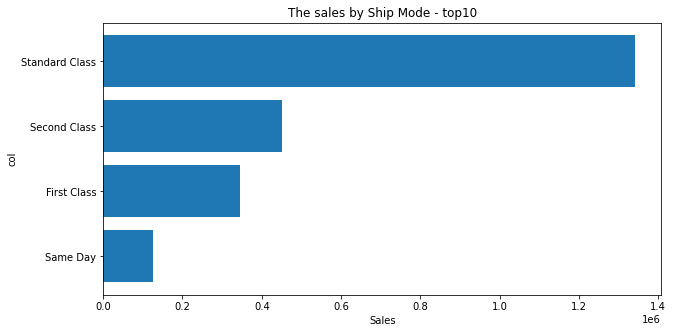

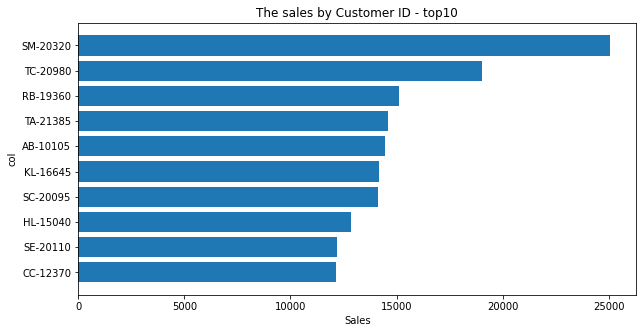

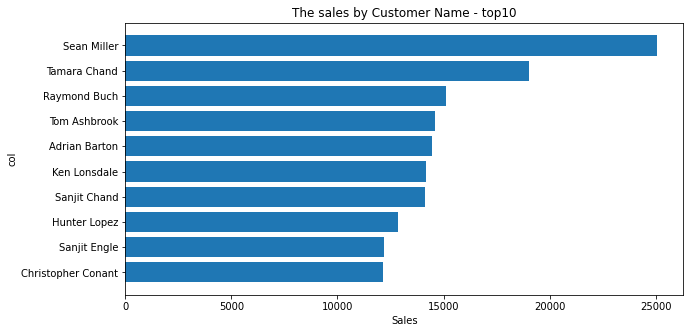

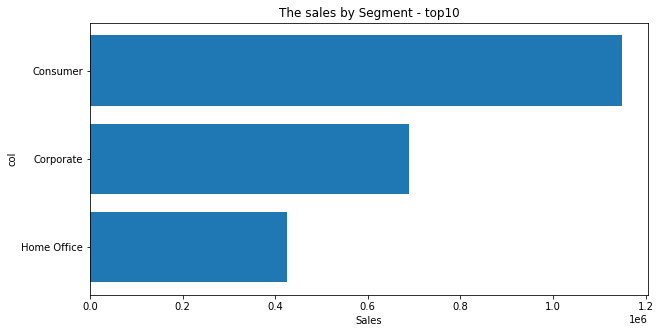

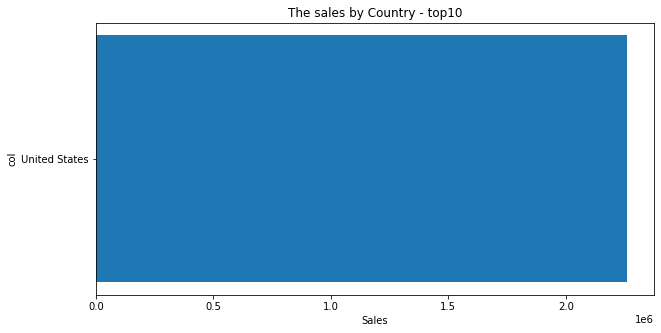

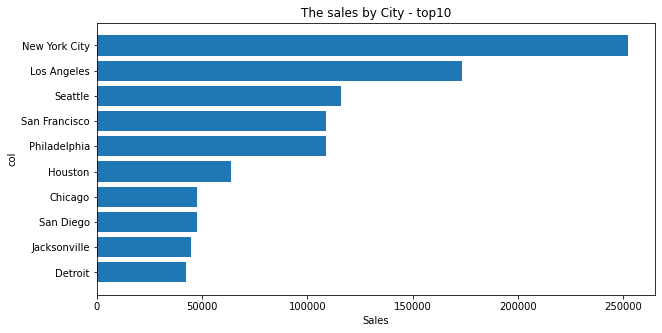

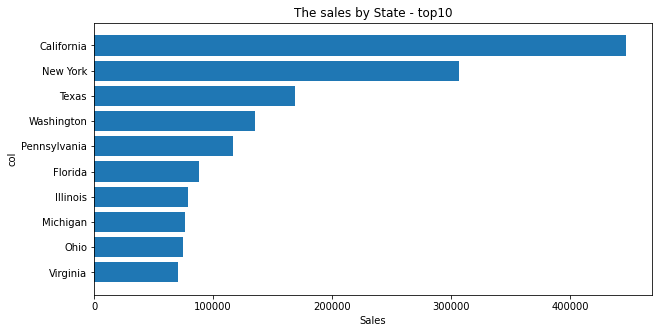

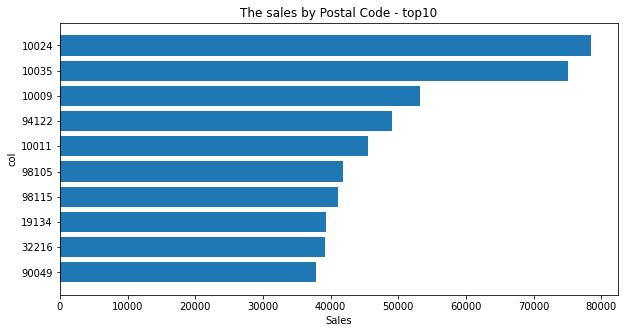

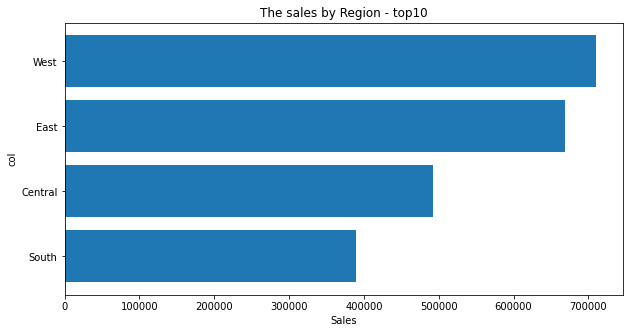

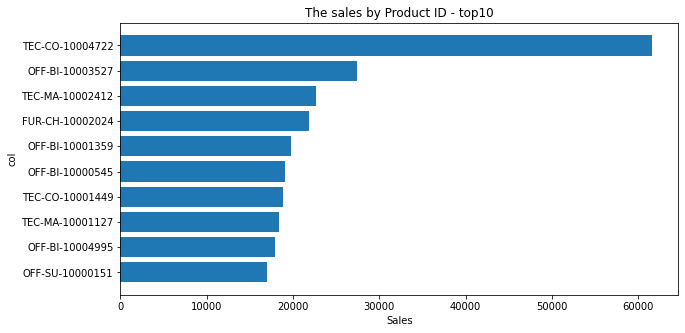

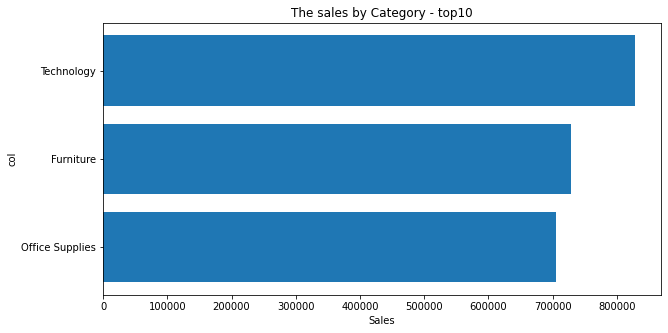

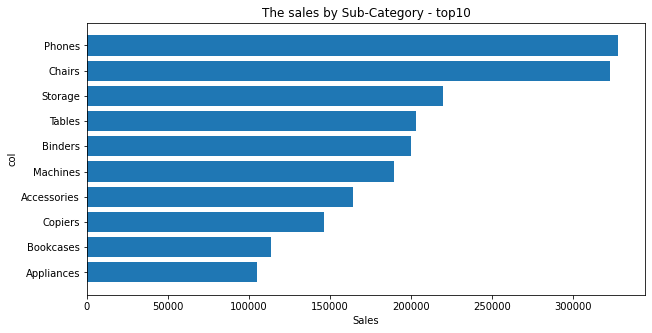

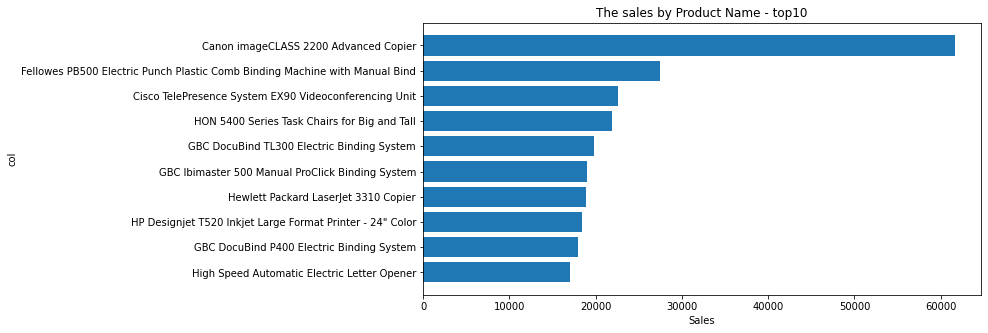

In [ ]:
# plot the sales by categorical variables (to show top 10 only)
for col in categorical_var:
    cat_value_counts=df.groupby(categorical_var[col]).Sales.sum().nlargest(10,keep='all').sort_values()
    plt.figure(figsize=(10,5))
    plt.barh(cat_value_counts.index,cat_value_counts.values)
    plt.xlabel('Sales')
    plt.ylabel(f'col')
    plt.title(f'The sales by {col} - top10')
    plt.show()

* Standard class is the most common ship mode.
* All the sales transactions occurred in US
* New York City had the most sales transactions, followed by Log Angeles. (in line with number of transactions)
* California had the most sales transactions, followed by New York.(in line with number of transactions)
* Region West had the most sales transactions, followed by East. (in line with number of transactions)
* The top 3 popular categories in terms of sales are technology, furniture and office supples. (different from number of transactions)
* The top 3 popular sub categories in terms of sales are phone, chairs, storage. (different from number of transactions)
technology and furnitures are more expensive than office supplies so even though it generated more transactions but with less revenue


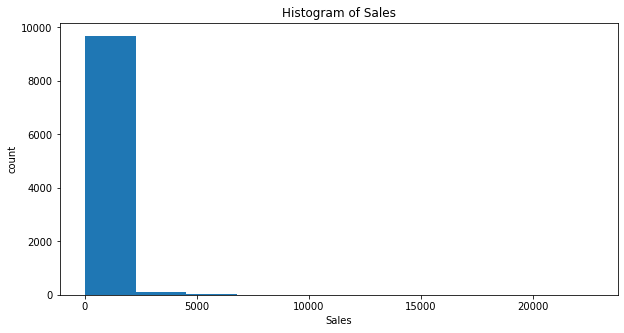

In [ ]:
for col in numerical_var:
    plt.figure(figsize=(10,5))
    plt.hist(numerical_var[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('count')
    plt.show()

It appears that most sales revenue are less than $2,500. Adjusted the log scale to make the histogram more readable

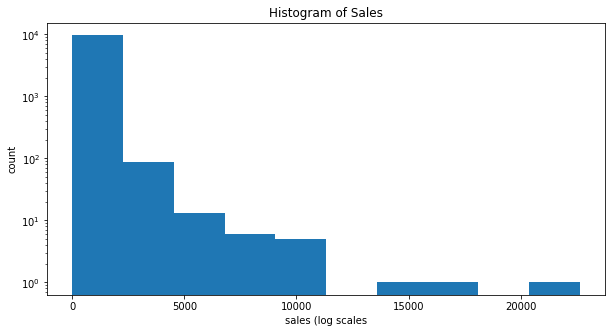

In [ ]:
for col in numerical_var:
    plt.figure(figsize=(10,5))
    plt.hist(numerical_var[col],log=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('sales (log scales')
    plt.ylabel('count')
    plt.show()

Most sales revenue were less than $2,500 with some exceptions

# Takeaways and Recommendations
* Among all the categories, technology generated the most revenue. It would be great if we can obtain cost and profit information
* Home offices customers purchased the least products, so I think creating a Home Office supplies & furniture set would boost sales for less popular products
* Supples, bookcases, table etc had the least sales, I think the company can do more research to figure out why these products were less popular
* Consumer and Corporate Segment made up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.


# 2. Feature Engineering

In [ ]:
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
df.set_index("Order Date", inplace = True)

In [ ]:
daily_df = pd.DataFrame(df['Sales'])

In [ ]:
daily_df = pd.DataFrame(daily_df['Sales'].resample('D').mean())

In [ ]:
daily_df_vis = df.resample('D').mean()

In [ ]:
daily_df_vis.fillna(0,inplace=True)
daily_df.fillna(0,inplace=True)

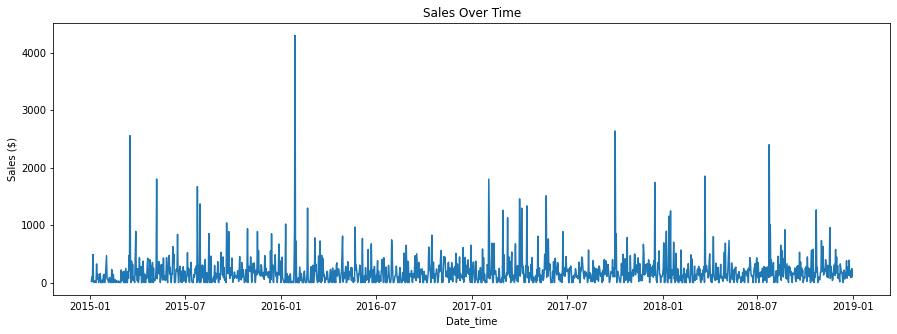

In [ ]:
# plot the sales over time (by order date)
plt.figure(figsize=(15,5))
plt.plot(daily_df)
plt.xlabel('Date_time')
plt.ylabel('Sales ($)')
plt.title('Sales Over Time')
plt.show()


In [ ]:
# Let's decompose the data and look at trend, seasonality and cycle out individually.
decomposition = tsa.seasonal_decompose(daily_df_vis, model='additive')

In [ ]:
daily_df_vis["Trend"] = decomposition.trend
daily_df_vis["Seasonal"] = decomposition.seasonal
daily_df_vis["Residual"] = decomposition.resid

daily_df_vis.head(10)

,Sales,Trend,Seasonal,Residual
Order Date,,,,
2015-01-03,16.448000,NaN,17.221408,NaN
2015-01-04,96.020000,NaN,42.133579,NaN
2015-01-05,19.536000,NaN,8.979948,NaN
2015-01-06,489.677778,97.933254,12.866588,378.877935
2015-01-07,43.579000,99.499968,22.162731,-78.083700
2015-01-08,0.000000,87.202825,-39.578364,-47.624462
2015-01-09,20.272000,84.411968,-63.785891,-0.354078
2015-01-10,27.415000,60.611182,17.221408,-50.417590
2015-01-11,9.940000,63.237039,42.133579,-95.430618


In [ ]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=daily_df_vis.index, y=daily_df_vis[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

* The sales trend was not stable
* Difficult to read seasonality since it's set as daily.
* I don't see a clear pattern in the residuals.

# 3. Build Time Series Model

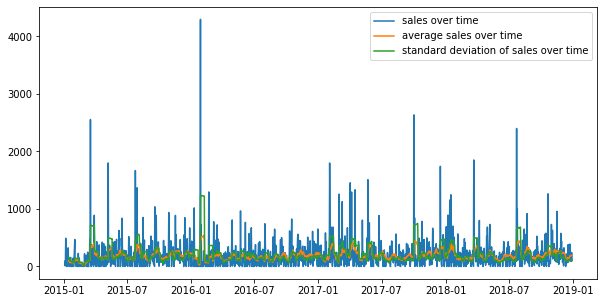

In [ ]:
# Check if time series data is staionary.
mean = daily_df_vis.rolling(window=12).mean()['Sales']
std = daily_df_vis.rolling(window=12).std()['Sales']
plt.figure(figsize=(10,5))
plt.plot(daily_df_vis.index,daily_df_vis['Sales'],label='sales over time')

plt.plot(mean,label='average sales over time')

plt.plot(std,label='standard deviation of sales over time')
plt.legend()
plt.show()

The mean and standard deviation seems to be constant

In [ ]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(daily_df_vis['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -24.952364
p-value: 0.000000


P value is less than 0.05 so we can reject the null hypothesis that the time series data is staionary

In [ ]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_df,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:21019.33733283006
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20881.262386481925
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20881.262386481925
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:20881.262386481925
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:20881.262386481925
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20881.262386481925
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20881.262386481925
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20881.262386481925
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20881.262386481925
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:21364.824871446683
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2

Seems like (1,1,1) and (1,1,1,12) is the optimal combination

In [ ]:
mod = sm.tsa.statespace.SARIMAX(daily_df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0292      0.025      1.185      0.236      -0.019       0.077
ma.L1         -1.0024      0.003   -301.692      0.000      -1.009      -0.996
sigma2      7.084e+04    888.352     79.748      0.000    6.91e+04    7.26e+04


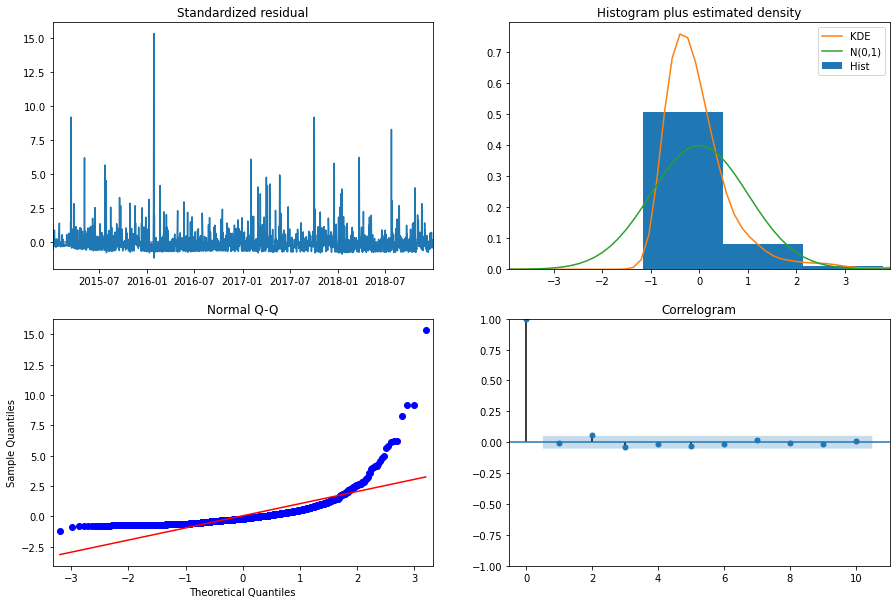

In [ ]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

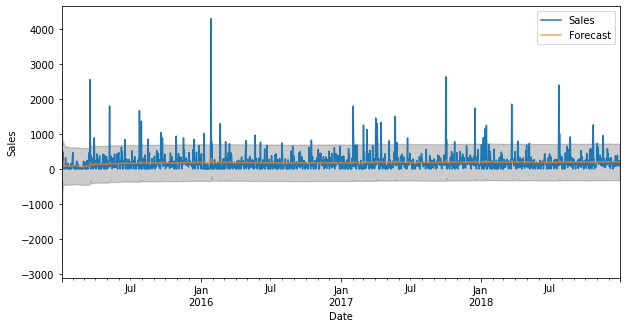

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False)
pred_ci = pred.conf_int()

ax = daily_df['2015':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(10, 5))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
daily_df_forecasted = pred.predicted_mean
daily_df_actual = daily_df['Sales']

# Compute the mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(daily_df_forecasted, daily_df_actual)
rmse = sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 266.86


In [87]:
min = daily_df.min()
max = daily_df.max()

In [89]:
print(f'The sales range is from {min} to {max}')

The sales range is from Sales    0.0
dtype: float64 to Sales    4297.644
dtype: float64


Our daily sales range from 0 to 4297. RMSE tells us that our model was able to forecast the average daily sales within 266.86 of the actual sales which is pretty good.